# Explore here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

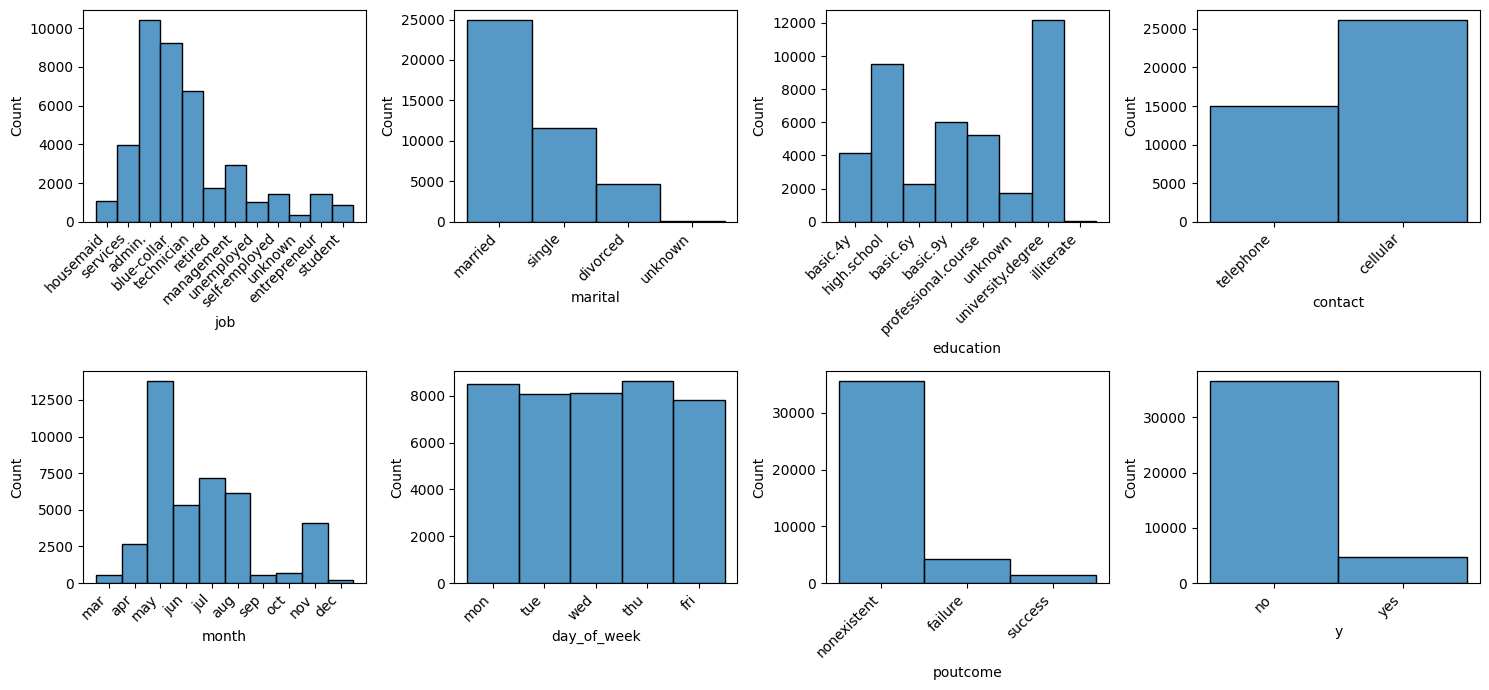

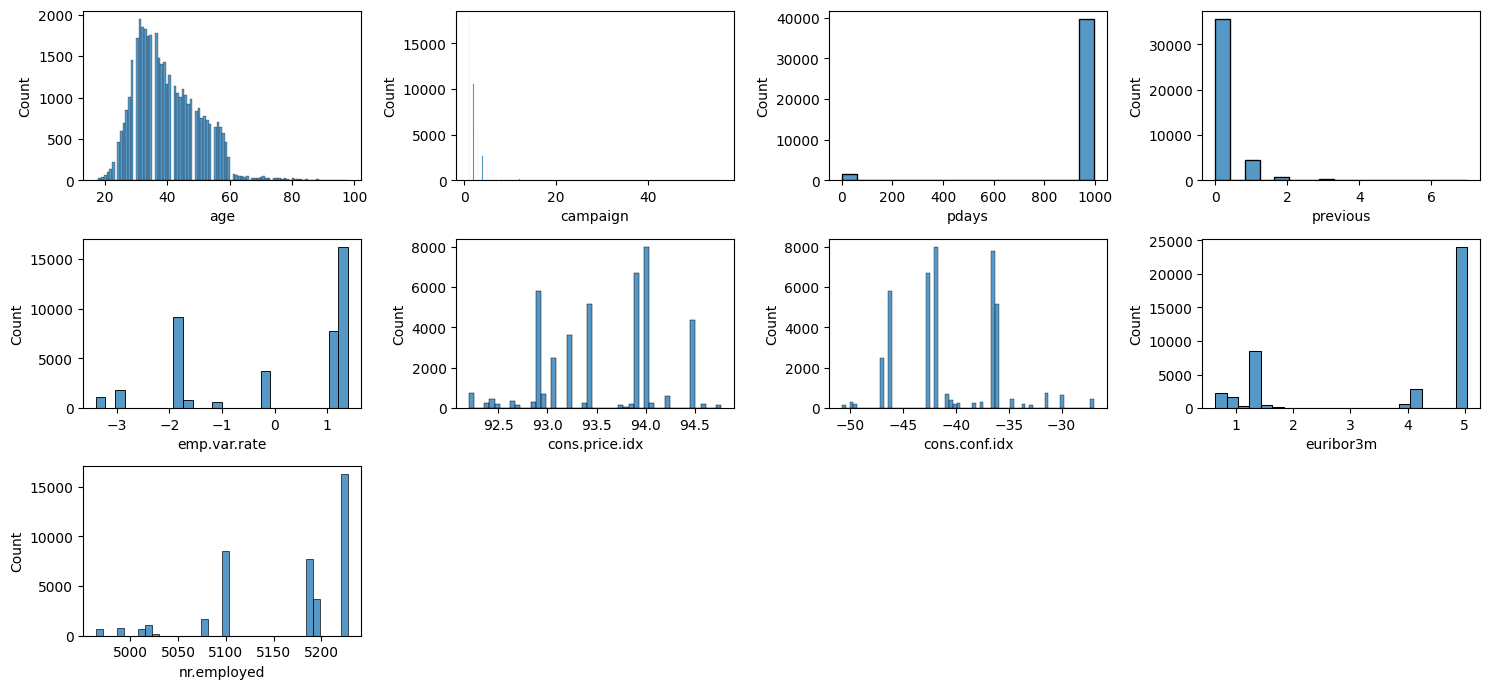

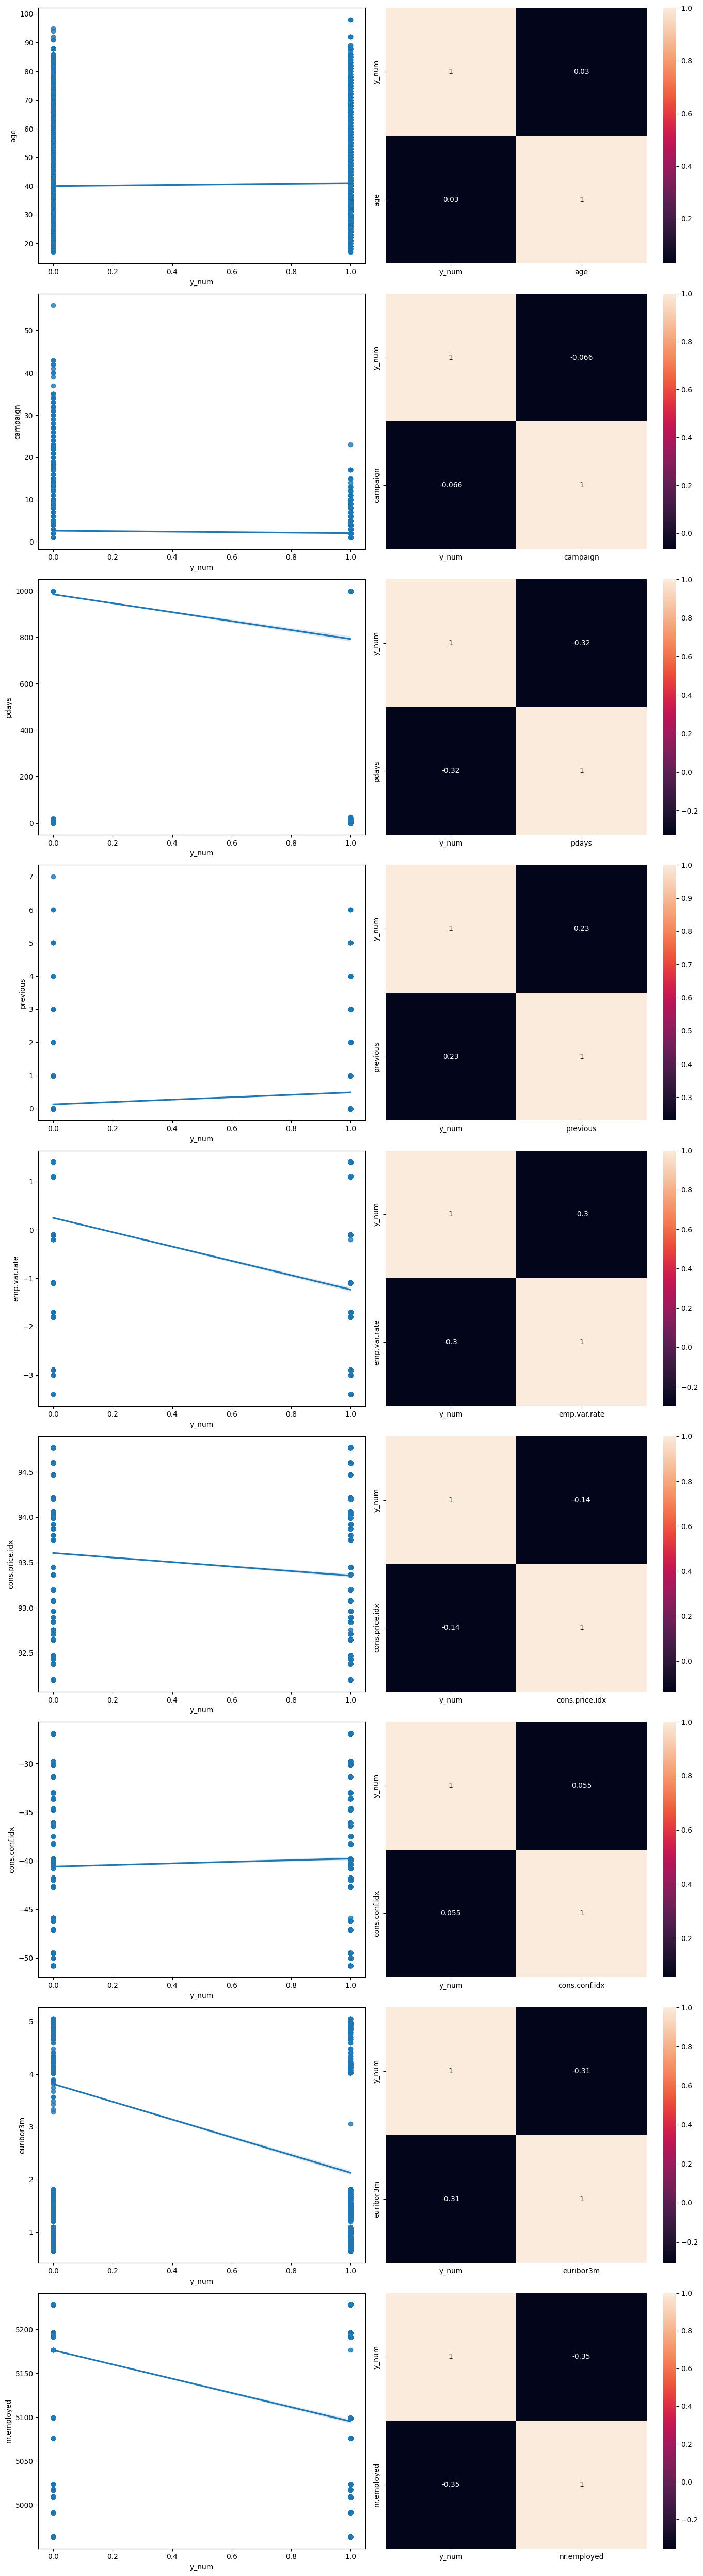

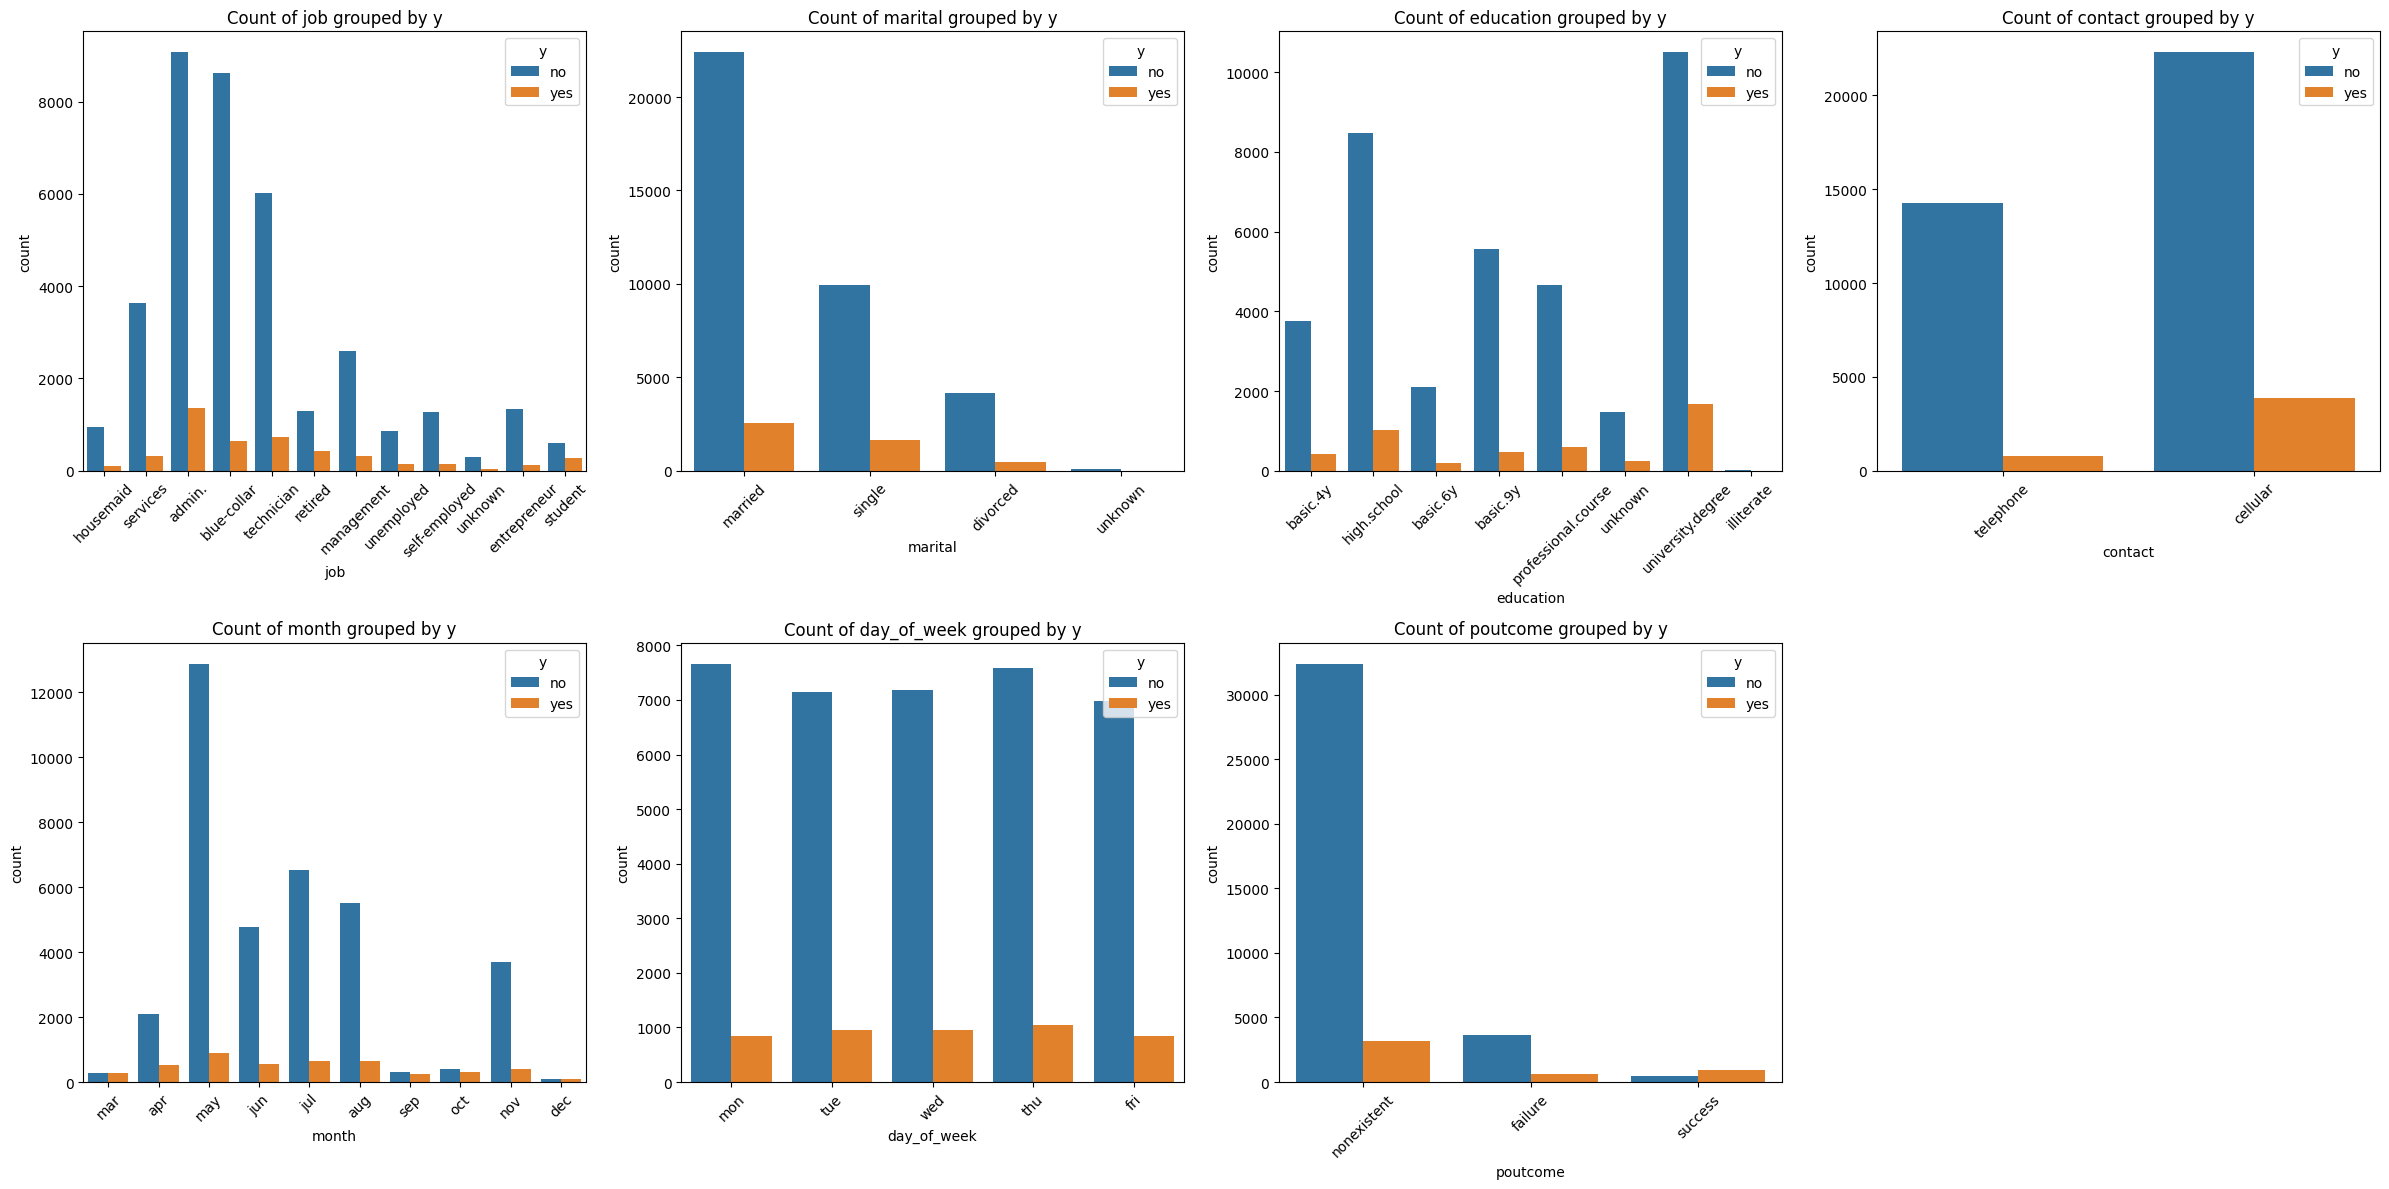

In [ ]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add data to variable 'total data'
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')

# Insert raw data inside raw folder inside root.
total_data.to_csv('/workspaces/ginotomasd-ml-project-logisticalregression/data/raw/total_data.csv')

# Check for columns and rows
total_data.shape

# Check values inside
total_data.info()

# We can see that only 1 column contains all the rows, and we fixed that by adding delimiters to our 'total_data' variable.
    # Now each variable is stored in an individual column, and we are able to check for nulls
        # We do not find any nulls, all columns contain the same number of rows.
            # We discard the possibility of duplicates

duplicates = total_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

total_data[duplicates]

# After checking duplicates, we discover they are not duplicates, as they contain different IDs but arent shown because, of the way the data is structured, there is no ID column.

# Next step we drop all the data that isn't useful: 'default', 'loan', 'housing', 'duration'

filtered_data = total_data.drop(['default', 'loan', 'housing', 'duration' ], axis=1, inplace=True)

# Analysis of categorical - numerical data

# Categorical data: 'job', 'marital', 'education', 'contact','month', 'day_of_week', 'poutcome', 'y'

fig, axis = plt.subplots(2, 4, figsize=(15,7))

custom_month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
total_data['month'] = pd.Categorical(total_data['month'], categories=custom_month_order, ordered=True)

sns.histplot(ax = axis[0,0], data = total_data, x = "job")
sns.histplot(ax = axis[0,1], data = total_data, x = "marital")
sns.histplot(ax = axis[0,2], data = total_data, x = "education")
sns.histplot(ax = axis[0,3], data = total_data, x = "contact")
sns.histplot(ax = axis[1,0], data = total_data, x = "month")
sns.histplot(ax = axis[1,1], data = total_data, x = "day_of_week")
sns.histplot(ax = axis[1,2], data = total_data, x = "poutcome")
sns.histplot(ax = axis[1,3], data = total_data, x = "y")

for ax in axis.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# As we visualize the data, we can make some observations:
    # 'job': The most popular jobs are 'Blue Collar', 'Administrative' and 'Technicians'
    # 'marital': As of marital status, there are more single than divorced potential clients, and married clients are the majority.
    # 'education': The majority of potential clients have a university degree, and the second most popular category is high school education, comprising almost 50% of the data.
    # 'contact': There was almost 66% more contact by cellular phone than telephone 
    # 'month': We can see that May has the most registered calls, which the next month declined and remained halved until August, when they completely dropped. In November, before Christmas peaked again, but dropped soon after the next month.
    # 'day of week': Mondays and Thursdays have the most amount of calls, while Friday had the least amount, although not by much.
    # 'poutcome': We can see that most people weren't reached by any previous campaigns, but for those who did, the overwhelming majority was a failure. 
    # 'y': An overwhelming majority said no to the campaign, while a small minority said otherwhise.


# Our next step will be to visualize the numerical data

# Numerical data 'age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'

fig, axis = plt.subplots(3, 4, figsize=(15,7))

sns.histplot(ax = axis[0,0], data = total_data, x = "age")
sns.histplot(ax = axis[0,1], data = total_data, x = "campaign")
sns.histplot(ax = axis[0,2], data = total_data, x = "pdays")
sns.histplot(ax = axis[0,3], data = total_data, x = "previous")
sns.histplot(ax = axis[1,0], data = total_data, x = "emp.var.rate")
sns.histplot(ax = axis[1,1], data = total_data, x = "cons.price.idx")
sns.histplot(ax = axis[1,2], data = total_data, x = "cons.conf.idx")
sns.histplot(ax = axis[1,3], data = total_data, x = "euribor3m")
sns.histplot(ax = axis[2,0], data = total_data, x = "nr.employed")

axis[2,1].axis('off')
axis[2,2].axis('off')
axis[2,3].axis('off')

plt.tight_layout()
plt.show()

# We can make several observations from the visualized data.
    # 'age': The majority of the potential clients are comprised within the ages of 20-60yo.
    # 'campaign': We observe that the majority of the potential clients are comprised within the 0-5 range, never contacting more than that.
    # 'pdays': Representing days since last contact, the overwhelming majority where never contacted the following days, only a few where contacted.
    # 'previous': The majority were never contacted before this campaign, while the most contacts made was 2.
    # 'emp.var.rate': The employment variation rate is high for positive values, which means the campaigns were performed during an economic growth period, wheree employment rose.
    # 'cons.price.idx': Most values are concentrated around 92–94, indicating a narrow spread in the consumer price index during the campaign periods. This stability may suggest low inflation volatility during most campaigns.
    # 'cons.conf.idx': Consumer confidence index mostly ranges from -50 to -30, indicating that despite variations, public confidence was generally low, possibly affecting campaign outcomes.
    # 'euribor3m': Most values lie above 1.0, peaking near 4.9, suggesting the campaigns mostly occurred during times of relatively high interest rates, which could affect customers’ willingness to invest in term deposits.
    # 'nr.employed': The distribution shows most values are clustered around 5000–5200, implying employment levels were relatively high and stable during the majority of the campaigns.

# Analysis of multivariate variables

# Numerical - Numerical Analysis (Correlation):

# Make sure 'y' is numeric
total_data['y_num'] = total_data['y'].map({'no': 0, 'yes': 1})

# Create a 9x2 subplot
fig, axis = plt.subplots(9, 2, figsize=(14, 50))

# Plot regplot and heatmap pairs
sns.regplot(ax=axis[0, 0], data=total_data, x='y_num', y='age')
sns.heatmap(total_data[['y_num', 'age']].corr(), annot=True, ax=axis[0, 1])

sns.regplot(ax=axis[1, 0], data=total_data, x='y_num', y='campaign')
sns.heatmap(total_data[['y_num', 'campaign']].corr(), annot=True, ax=axis[1, 1])

sns.regplot(ax=axis[2, 0], data=total_data, x='y_num', y='pdays')
sns.heatmap(total_data[['y_num', 'pdays']].corr(), annot=True, ax=axis[2, 1])

sns.regplot(ax=axis[3, 0], data=total_data, x='y_num', y='previous')
sns.heatmap(total_data[['y_num', 'previous']].corr(), annot=True, ax=axis[3, 1])

sns.regplot(ax=axis[4, 0], data=total_data, x='y_num', y='emp.var.rate')
sns.heatmap(total_data[['y_num', 'emp.var.rate']].corr(), annot=True, ax=axis[4, 1])

sns.regplot(ax=axis[5, 0], data=total_data, x='y_num', y='cons.price.idx')
sns.heatmap(total_data[['y_num', 'cons.price.idx']].corr(), annot=True, ax=axis[5, 1])

sns.regplot(ax=axis[6, 0], data=total_data, x='y_num', y='cons.conf.idx')
sns.heatmap(total_data[['y_num', 'cons.conf.idx']].corr(), annot=True, ax=axis[6, 1])

sns.regplot(ax=axis[7, 0], data=total_data, x='y_num', y='euribor3m')
sns.heatmap(total_data[['y_num', 'euribor3m']].corr(), annot=True, ax=axis[7, 1])

sns.regplot(ax=axis[8, 0], data=total_data, x='y_num', y='nr.employed')
sns.heatmap(total_data[['y_num', 'nr.employed']].corr(), annot=True, ax=axis[8, 1])

plt.tight_layout()
plt.show()

# Observations:
    # There is no positive correlation between any of the variables, in fact, there are some negative correlations between variables.

# Categorical -  Categorical Analysis

# Categorical variables: 'job', 'marital', 'education', 'contact','month', 'day_of_week', 'poutcome', 'y'



# We will analyze y with the rest of variables, again:

categorical_vars = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()  # Flatten to access as a 1D array

for i, var in enumerate(categorical_vars):
    sns.countplot(data=total_data, x=var, hue='y', ax=axes[i])
    axes[i].set_title(f'Count of {var} grouped by y')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the unused 8th subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

